In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

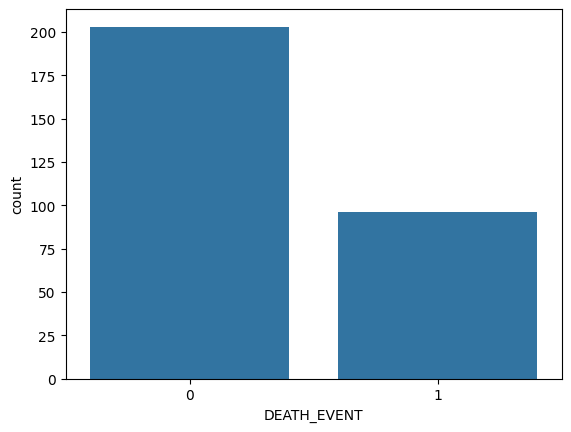

In [6]:
sns.countplot(x='DEATH_EVENT', data=df)

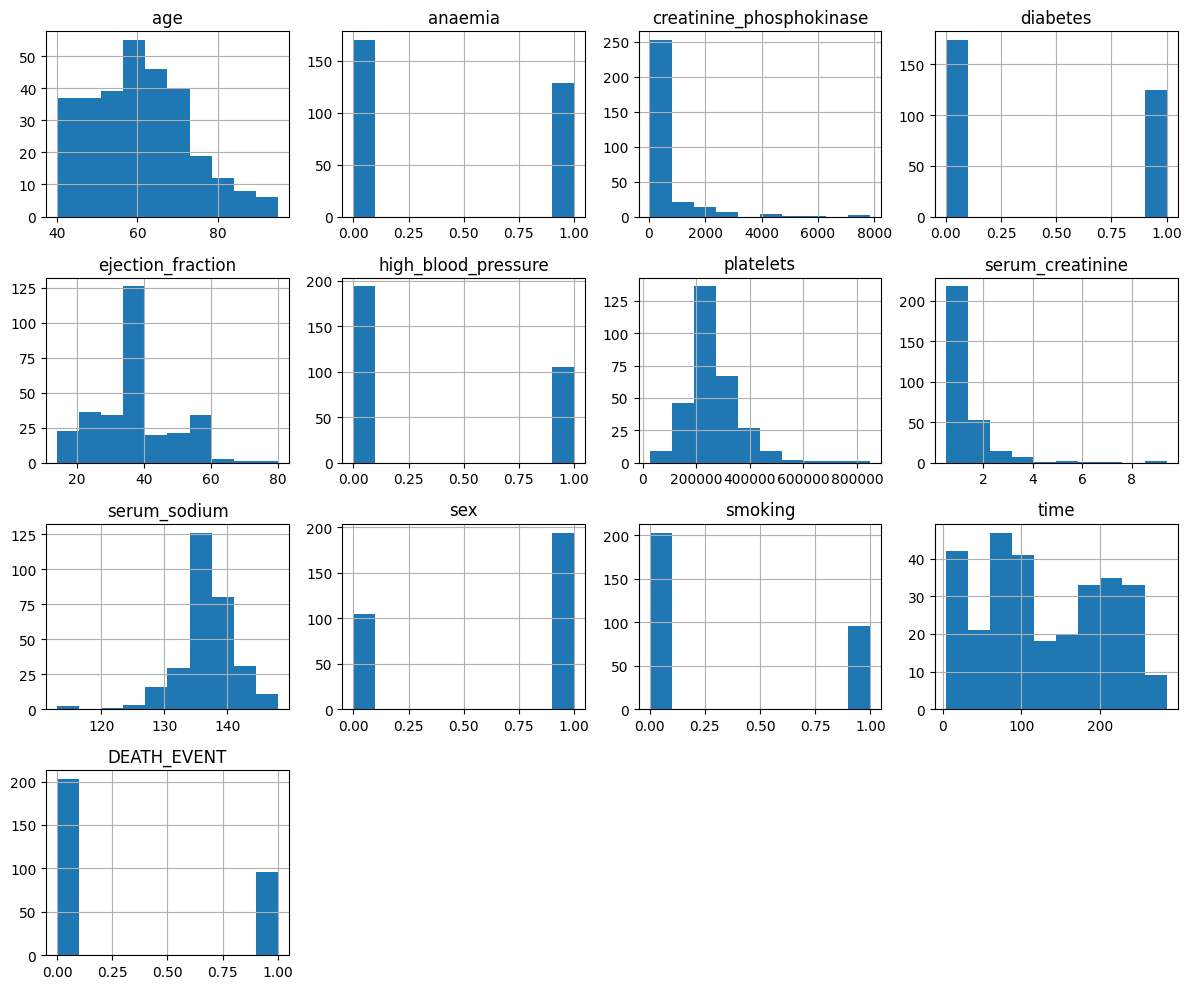

In [7]:
df.hist(figsize=(12,10))
plt.tight_layout()

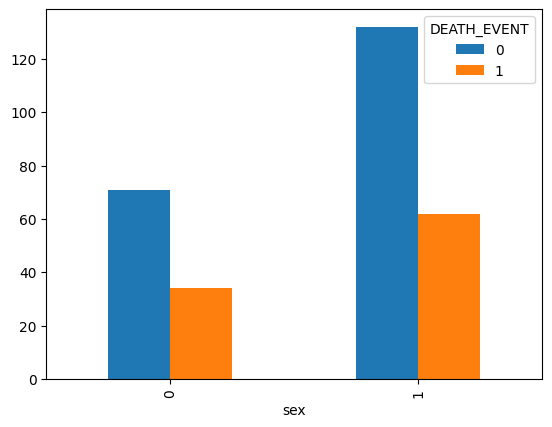

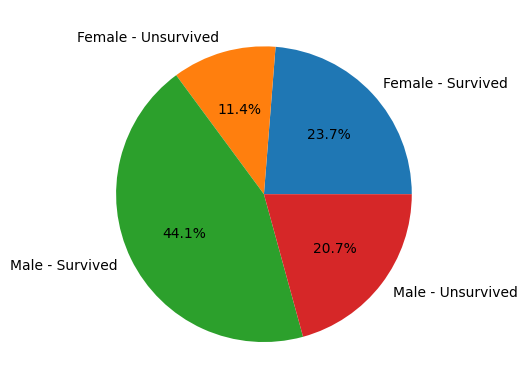

In [8]:
grouped_sex= df.groupby(['sex', 'DEATH_EVENT']).size()
grouped_sex.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_sex, labels=['Female - Survived', 'Female - Unsurvived', 'Male - Survived', 'Male - Unsurvived'], autopct='%1.1f%%')
plt.show()

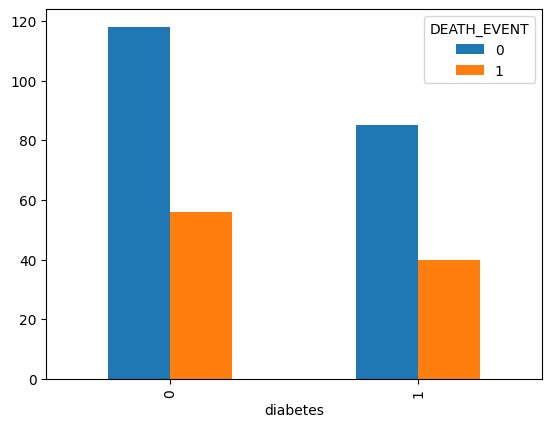

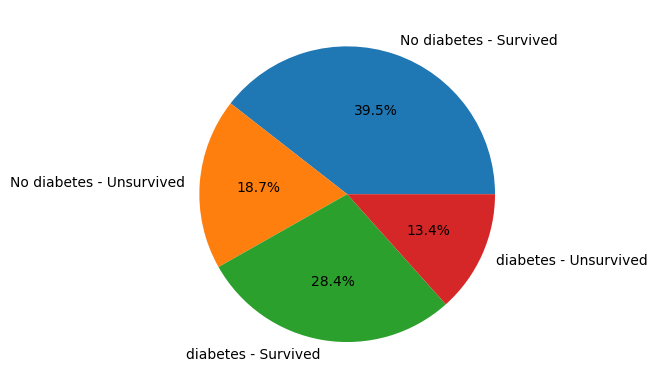

In [9]:
grouped_diabetes= df.groupby(['diabetes', 'DEATH_EVENT']).size()
grouped_diabetes.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_diabetes, labels=['No diabetes - Survived', 'No diabetes - Unsurvived', 'diabetes - Survived', 'diabetes - Unsurvived'], autopct='%1.1f%%')
plt.show()

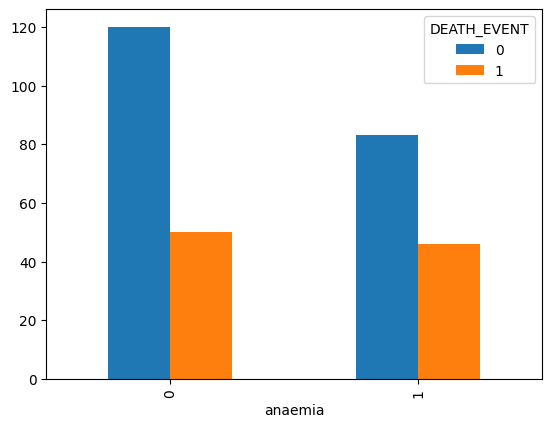

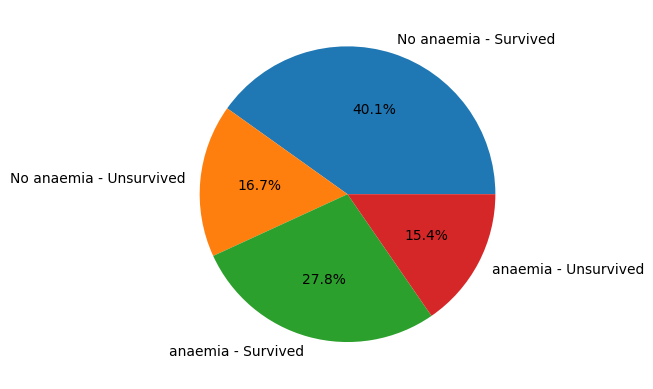

In [10]:
grouped_anaemia= df.groupby(['anaemia', 'DEATH_EVENT']).size()
grouped_anaemia.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_anaemia, labels=['No anaemia - Survived', 'No anaemia - Unsurvived', 'anaemia - Survived', 'anaemia - Unsurvived'], autopct='%1.1f%%')
plt.show()

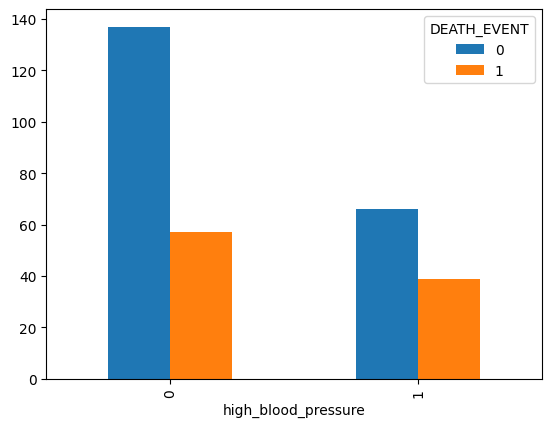

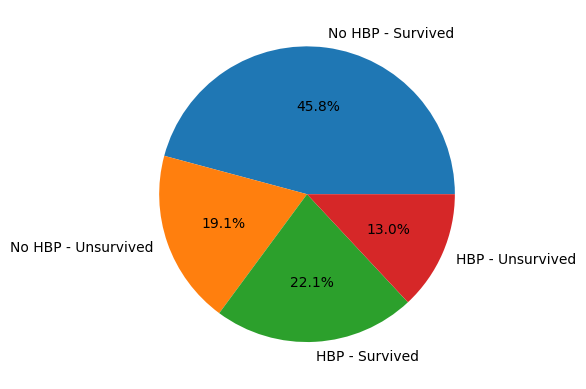

In [11]:
grouped_high_blood_pressure= df.groupby(['high_blood_pressure', 'DEATH_EVENT']).size()
grouped_high_blood_pressure.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_high_blood_pressure, labels=['No HBP - Survived', 'No HBP - Unsurvived', 'HBP - Survived', 'HBP - Unsurvived'], autopct='%1.1f%%')
plt.show()

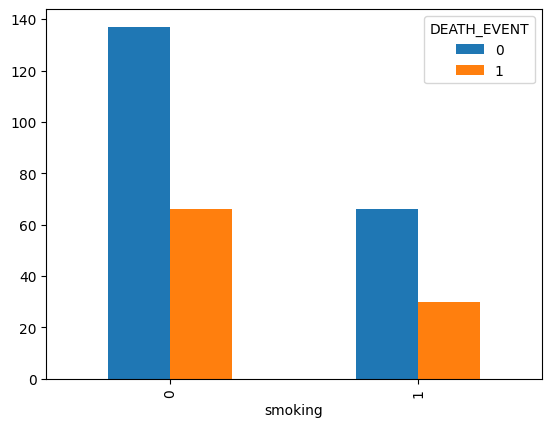

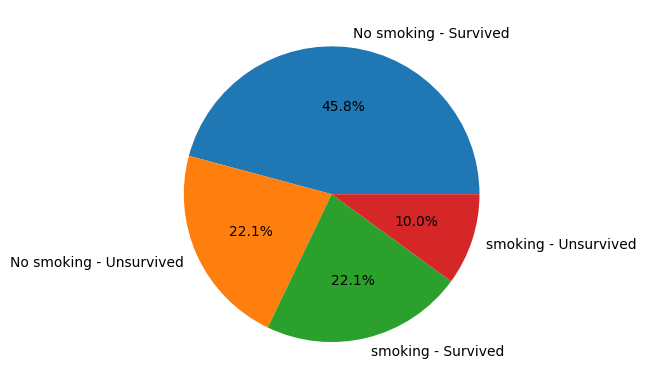

In [12]:
grouped_smoking= df.groupby(['smoking', 'DEATH_EVENT']).size()
grouped_smoking.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_smoking, labels=['No smoking - Survived', 'No smoking - Unsurvived', 'smoking - Survived', 'smoking - Unsurvived'], autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Distribution of age')

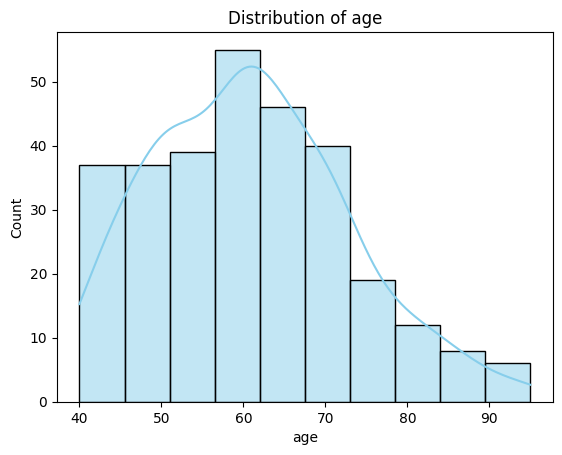

In [13]:
sns.histplot(x=df['age'], kde=True, color='skyblue')
plt.title('Distribution of age')

Text(0.5, 1.0, 'mean of age and Death Event')

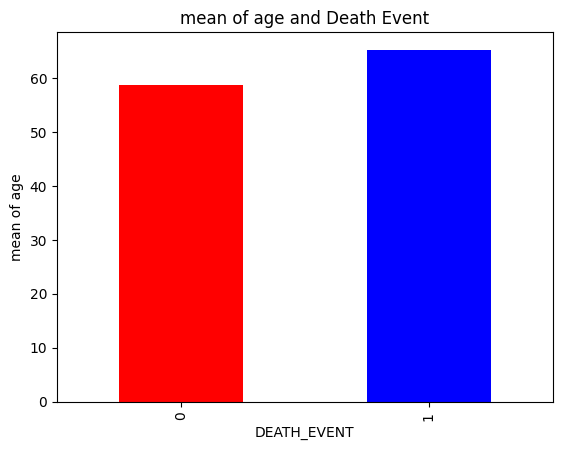

In [14]:
df['age'].groupby(df['DEATH_EVENT']).mean().plot(kind='bar', color=('red','blue'))

plt.ylabel('mean of age')
plt.title('mean of age and Death Event')

In [15]:
numerical_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
df_check = df[numerical_features]
df_check.describe()
Q1 = df_check.quantile(0.25)
Q3 = df_check.quantile(0.75)
IQR = Q3-Q1
((df_check < (Q1 - 1.5*IQR)) | (df_check > (Q3 + 1.5*IQR))).any()
# checking for outliers

age                         False
anaemia                     False
creatinine_phosphokinase     True
diabetes                    False
ejection_fraction            True
high_blood_pressure         False
platelets                    True
serum_creatinine             True
serum_sodium                 True
sex                         False
smoking                     False
time                        False
dtype: bool

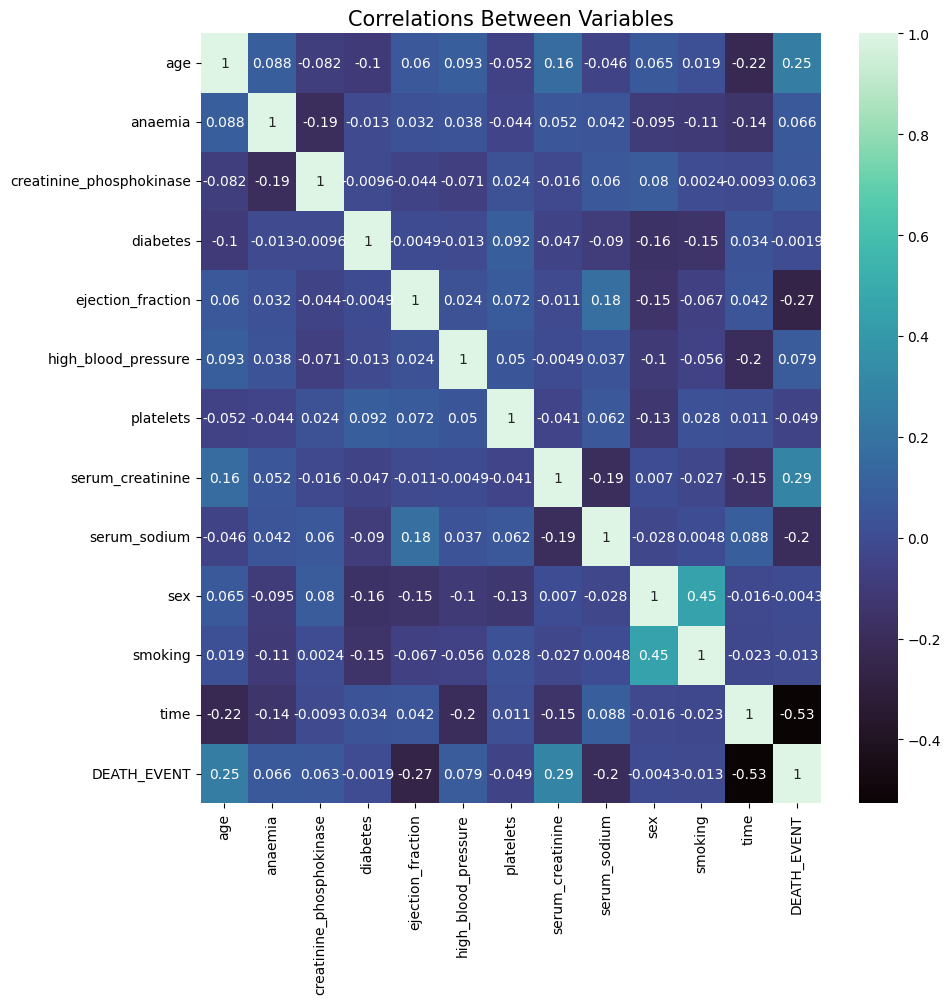

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="mako")
plt.title("Correlations Between Variables",size=15)
plt.show()

In [33]:
# Correlation with respect to output variable(death_event)
corr_matrix = df.corr()
corr_matrix['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
x = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
# splitting the data into training and testing data

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_pred_lg = lg.predict(x_test)

Accuracy: 0.8666666666666667
F1 Score: 0.7142857142857143
Precision: 0.7142857142857143
Recall: 0.7142857142857143


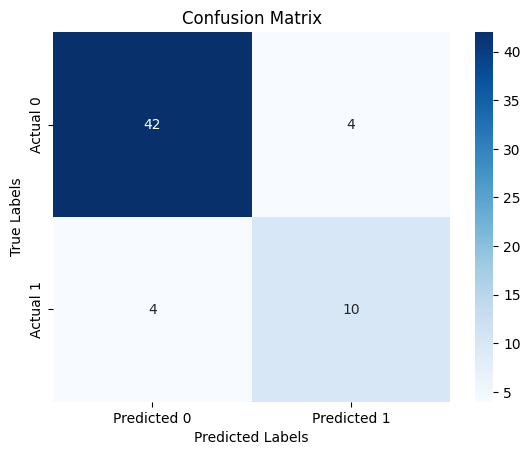

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_lg)
print("Accuracy:", accuracy)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_lg)
print("F1 Score:", f1)

# Calculate Precision
precision = precision_score(y_test, y_pred_lg)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred_lg)
print("Recall:", recall)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred_dt = dt.predict(x_test)

Accuracy: 0.8333333333333334
F1 Score: 0.6428571428571429
Precision: 0.6428571428571429
Recall: 0.6428571428571429


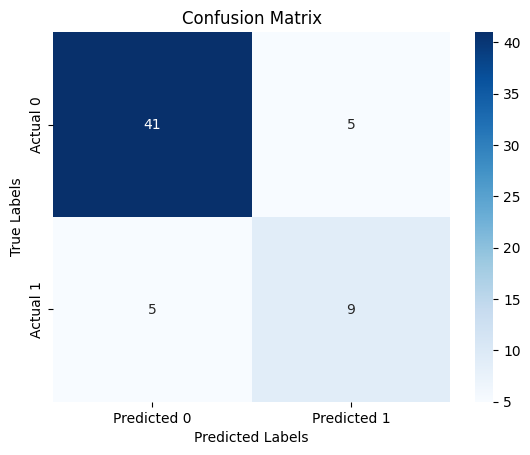

In [24]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_dt)
print("F1 Score:", f1)

# Calculate Precision
precision = precision_score(y_test, y_pred_dt)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred_dt)
print("Recall:", recall)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
y_pred_rf = rf.predict(x_test)

Accuracy: 0.9166666666666666
F1 Score: 0.8275862068965518
Precision: 0.8
Recall: 0.8571428571428571


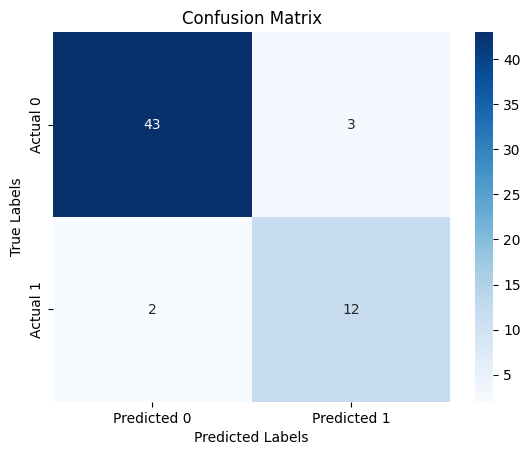

In [27]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1)

# Calculate Precision
precision = precision_score(y_test, y_pred_rf)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred_rf)
print("Recall:", recall)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred_xg = xg.predict(x_test)

Accuracy: 0.8833333333333333
F1 Score: 0.7586206896551724
Precision: 0.7333333333333333
Recall: 0.7857142857142857


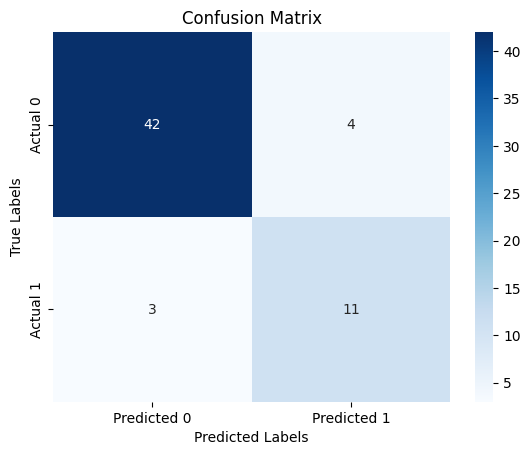

In [31]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", accuracy)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_xg)
print("F1 Score:", f1)

# Calculate Precision
precision = precision_score(y_test, y_pred_xg)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred_xg)
print("Recall:", recall)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

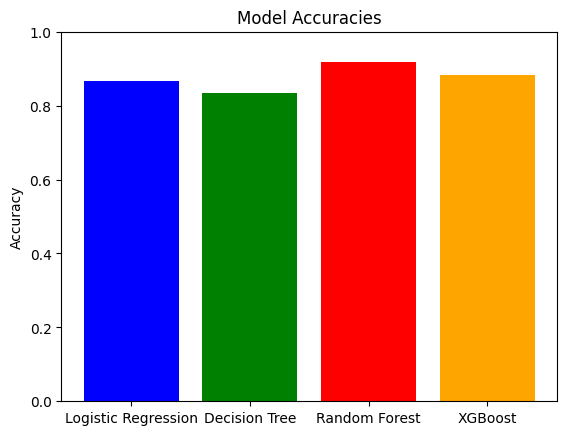

In [32]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
model_accuracies = []

# Logistic Regression
accuracy_lg = accuracy_score(y_test, y_pred_lg)
model_accuracies.append(accuracy_lg)

# Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
model_accuracies.append(accuracy_dt)

# Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
model_accuracies.append(accuracy_rf)

# XGBoost
accuracy_xg = accuracy_score(y_test, y_pred_xg)
model_accuracies.append(accuracy_xg)

# Plotting the bar chart
plt.bar(models, model_accuracies, color=['blue', 'green', 'red', 'orange'])
plt.ylim(0, 1)  # Set the y-axis limit to the range [0, 1]
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()